# Aprendizaje No Supervisado - Clustering

**Clustering**: es la organización de objetos en grupos o clusters. Más
precisamente, es el particionamiento de un conjunto de ejemplos en
subconjuntos (clusters) de manera que los datos en un mismo cluster
tengan características en común.
 
Un buen agrupamiento es aquel que produce clusters de calidad, con:
*   alta similitud intra-cluster
*   baja similitud inter cluster
---
**Técnicas:**

*   Clustering basado en **particionamiento** (veremos k-Means).
Dividen los ejemplos en subconjuntos disjuntos tal que cada objeto pertenece exactamente a un cluster
*   Clustering **jerárquico** (veremos Aglomerativo (bottom-up))
Generan un conjunto de clusters anidados en un árbol o jerarquía


## K-means utilizando scikit-learn

**Aunque  k-means se puede aplicar a los datos en dimensiones superiores, veremos los siguientes ejemplos utilizando un conjunto de datos bidimensional con el fin  visualizarlos.**


A continuación se crea un  conjunto de datos que consta de 150 puntos generados aleatoriamente que se agrupan aproximadamente en tres regiones con mayor densidad, que se visualiza a través de un diagrama de dispersión bidimensional:
 


In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

**En aplicaciones de clustering en el mundo real, no tenemos ninguna información de categoría (información proporcionada como evidencia empírica en lugar de inferencia) sobre los ejemplos; si nos dieran etiquetas de clase, esta tarea caería en la categoría de aprendizaje supervisado**

In [ ]:
import pandas as pd
combined_data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
combined_data.columns=['X','Y','Cluster']
combined_data

,X,Y,Cluster
0,2.605097,1.225296,1
1,0.532377,3.313389,0
2,0.802314,4.381962,0
3,0.528537,4.497239,0
4,2.618585,0.357698,1
...,...,...,...
145,-2.238934,2.671222,2
146,-1.872929,3.686071,2
147,-1.889703,2.226200,2
148,2.253271,0.351133,1


In [ ]:
from IPython.display import Image
%matplotlib inline

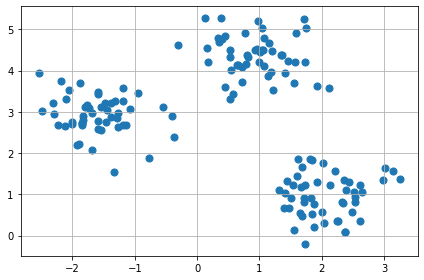

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1] , s=50)
plt.grid()
plt.tight_layout()
plt.show()

Seguidamente usamos el algoritmo de k-means provisto por sklearn con los siguientes parámetros:

*    **Número de grupos deseados: n_clusters=3**.
(especificar el número de clústeres a priori es una de las limitaciones de k-means)
*   **Número de corridas:  n_init = 10**.  
Se ejecutan  10 corridas de forma independiente, con diferentes **centroides aleatorios** para elegir el modelo final con SSE (sum of squared errors (SSE)) más bajo. 
*   **Número máximo de iteraciones para cada ejecución individual:  max_iter=300**. 
Tenga en cuenta que la implementación de k-means en scikit-learn se detiene anticipadamente si converge antes de alcanzar el número máximo de iteraciones
*   **Tolerancia relativa con respecto a la inercia para declarar convergencia: tol=1e-04 (= 0.0001)**.
Parámetro que controla la tolerancia con respecto a los cambios en el SSE dentro del clúster para declarar la convergencia. 

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

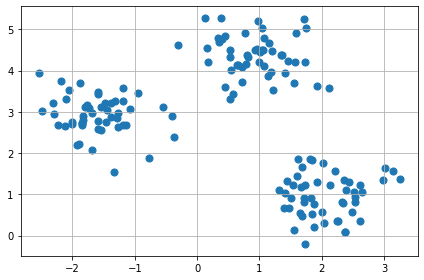

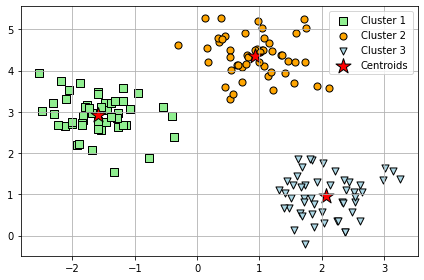

In [ ]:
plt.scatter(X[:, 0], X[:, 1] , s=50)
plt.grid()
plt.tight_layout()
plt.show()

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

plt.show()

### Una forma más inteligente de colocar los centroides del clúster inicial usando k-means ++

Otra estrategia es colocar los centroides iniciales lejos uno del otro a través del algoritmo k-means ++, lo que conduce a resultados mejores y más consistentes que el clásico k-means
 


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='k-means++', 
            max_iter=300)

y_km = km.fit_predict(X)

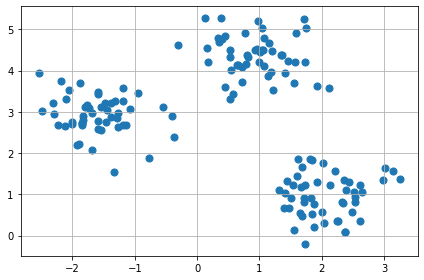

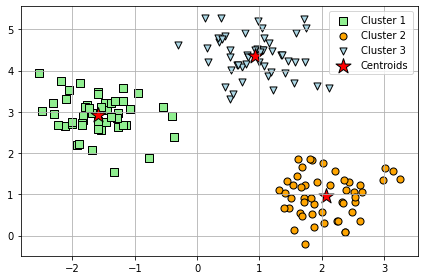

In [ ]:
plt.scatter(X[:, 0], X[:, 1] , s=50)
plt.grid()
plt.tight_layout()
plt.show()

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

plt.show()

##Evaluación con criterios internos##
**Criterio interno:** el ground truth (clases reales) rara vez está disponible, pero la validación debe realizarse de todos modos. Se usan para medir la bondad de un agrupamiento sin información externa.

Minimiza o maximiza un índice interno:
*   Squared Error (SSE)
*   Silhouette Coefficient
---
Para cuantificar la calidad de la agrupación, necesitamos utilizar métricas intrínsecas, como por ejemplo la SSE dentro del clúster (distorsión).
Convenientemente, no necesitamos calcular el SSE dentro del clúster explícitamente cuando usamos scikit-learn, ya que es accesible a través del atributo inercia_ después de ajustar un modelo KMeans (fit)


In [ ]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


### Usando el método del codo para encontrar el número óptimo de grupos


 




Basado en el SSE dentro del clúster, podemos usar una herramienta gráfica, el llamado **método del codo**, para estimar el número óptimo de clústeres, k, para una tarea determinada. Podemos decir que si k aumenta, la distorsión disminuirá. Esto se debe a que los ejemplos estarán más cerca de los centroides a los que están asignados. **La idea detrás del método del codo es identificar el valor de k donde la distorsión comienza a aumentar más rápidamente**, lo que será más claro si trazamos la distorsión para diferentes valores de k:
 


[713.6998289434159, 283.46101780209307, 72.47601670996698, 62.84061768542222, 56.28826733102417, 47.43195201948495, 39.95659663146229, 35.322556689201335, 30.885712110158103, 26.96180485860485]


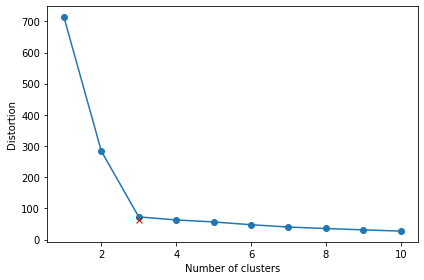

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                max_iter=300,
                random_state=0 
                )
    km.fit(X)
    distortions.append(km.inertia_)
print(distortions)
plt.plot(range(1, 11), distortions, marker='o')
plt.plot(3, distortions[3], 'r*',marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

*   **Solo da un indicio del k óptimo**
*   **No siempre determina exatamente cuantos clusters** 



### Cuantificación de la calidad de la agrupación a través de gráficos de silueta

Otra métrica intrínseca para evaluar la calidad de una agrupación es el análisis de silueta. Es un método de interpretación y validación de consistencia dentro de grupos de datos. La técnica proporciona una representación gráfica sucinta de qué tan bien se ha clasificado cada objeto.
El valor de la silueta es una medida de **cuán similar es un objeto a su propio grupo (cohesión) en comparación con otros grupos (separación)**. La silueta varía de −1 a +1, donde un valor alto indica que el objeto está bien emparejado con su propio grupo y mal emparejado con los grupos vecinos. Si la mayoría de los objetos tienen un valor alto, entonces la configuración de agrupamiento es apropiada. Si muchos puntos tienen un valor bajo o negativo, entonces la configuración de agrupación puede tener demasiados o muy pocos grupos

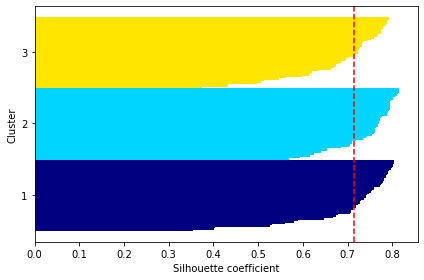

In [ ]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

#calculo 
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

#grafico
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

**Gráfico de Silueta utilizando la biblioteca "Yellowbrick: Machine Learning Visualization
"** 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


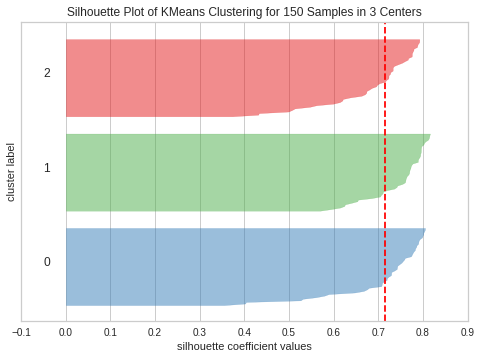

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
km = KMeans(n_clusters=3, 
            init='k-means++', 
            max_iter=300,
            tol=1e-04,
            random_state=0)

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

Para ver cómo se ve un diagrama de silueta para un agrupamiento relativamente malo, calcularemos el agrupamiento con solo dos centroides 

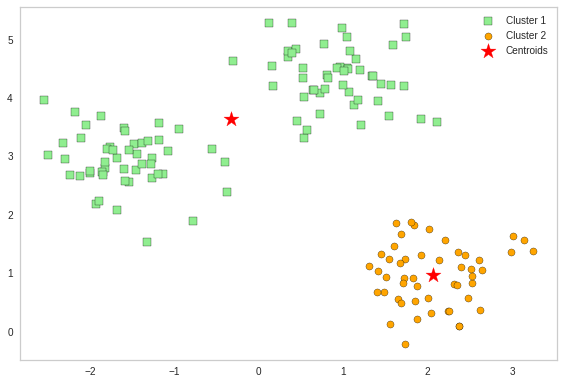

In [ ]:
km = KMeans(n_clusters=2,
            init='k-means++',
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

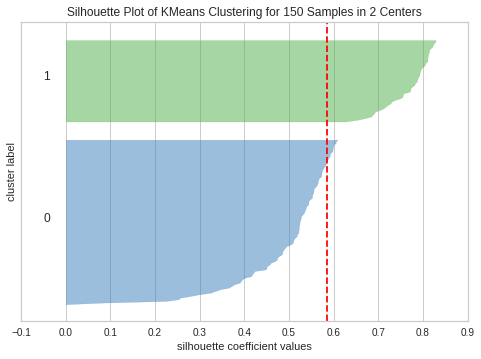

In [ ]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

**Como puede ver en la gráfica resultante, las siluetas ahora tienen longitudes y anchuras visiblemente diferentes, lo que evidencia un agrupamiento relativamente malo o al menos subóptimo**

**Pros** 
*    Simple y eficiente dentro de los algoritmos de particionamiento

**Contras**


*   Necesita establecer k de antemano
*   Sensible a ruido y outliers, puede caer en mínimos locales (k-
Medoids)
*   Sensitivo a la elección de las semillas iniciales (k-Means++)
*   Es aplicable cuando es posible calcular el centroide (k-Modes para
atributos categóricos)

## Clustering Jerárquico Aglomerativo
Los **algoritmos jerárquicos** construyen un árbol binario o dendograma a partir de un conjunto de ejemplos, lo que puede ayudar con la interpretación de los resultados creando taxonomías significativas. Otra ventaja de este enfoque jerárquico es que no necesitamos especificar el número de clústeres por adelantado. 

Los métodos **aglomerativos**(bottom-up) comienzan con cada ejemplo en un cluster diferente y combinan iterativamente los clusters para formar
clusters mayores.

Asume que existe una función de similitud que
determina la similitud de dos clusters conteniendo múltiples instancias:
Single link

*   **Single link** (dos ejemplos más similares entre ambos clusters)
*   **Complete link** (dos ejemplos menos similares entre ambos clusters)
*   **Group average** (Promedio de similitudes entre los ejemplos de ambos clusters)
*   **Varianza Mínima de Ward** minimiza la varianza total dentro del grupo.
 






### Applying agglomerative clustering via scikit-learn

**Aplicado al dataset Iris**

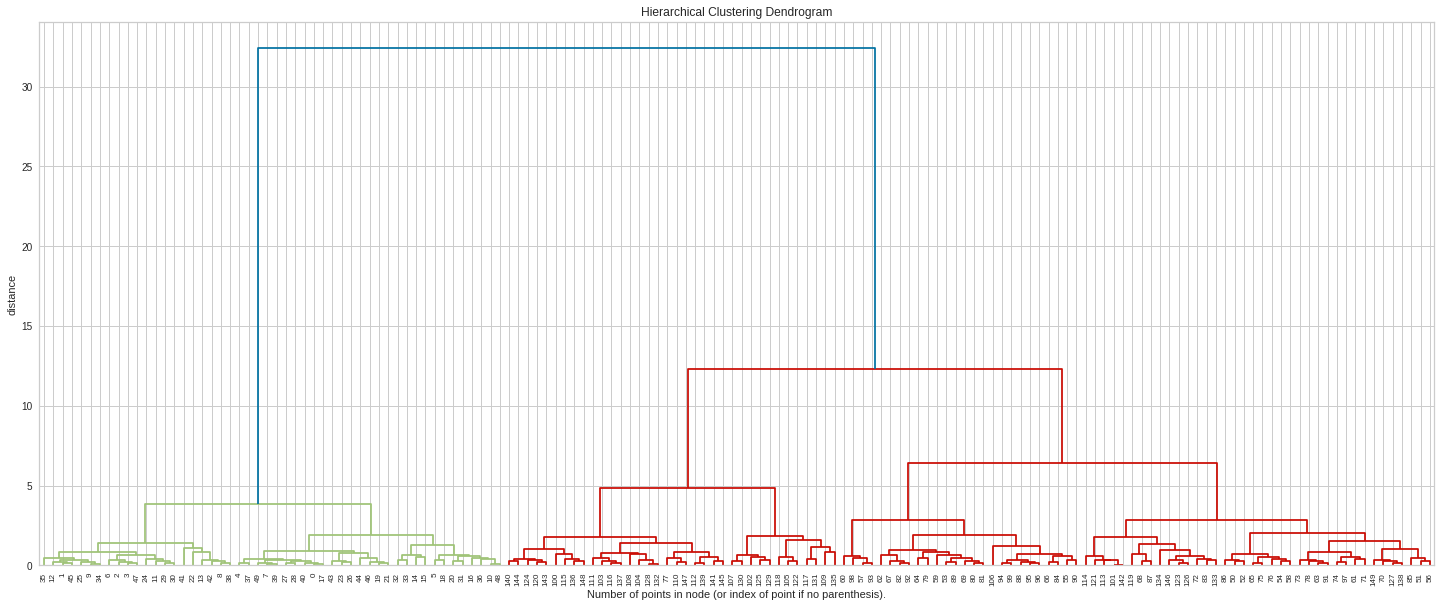

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(np.double)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
#Criterio de Varianza Mínima de Ward minimiza el total dentro de la varianza del clúster.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='ward')
model = model.fit(X)

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')

#plot all
plot_dendrogram(model,leaf_rotation=90,leaf_font_size=8)

plt.ylabel('distance')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**Visualizando 3 niveles**

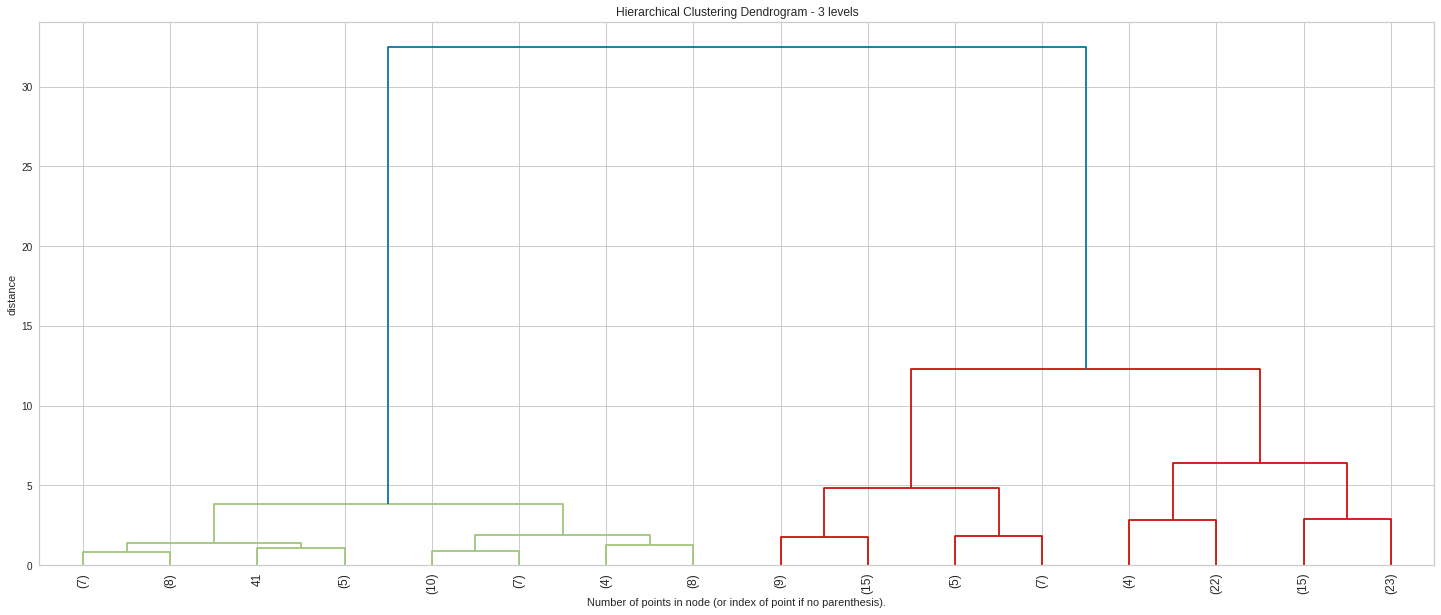

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - 3 levels')

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3,leaf_rotation=90,leaf_font_size=12)

plt.ylabel('distance')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


**Visualizando las ulitmas p agrupaciones**

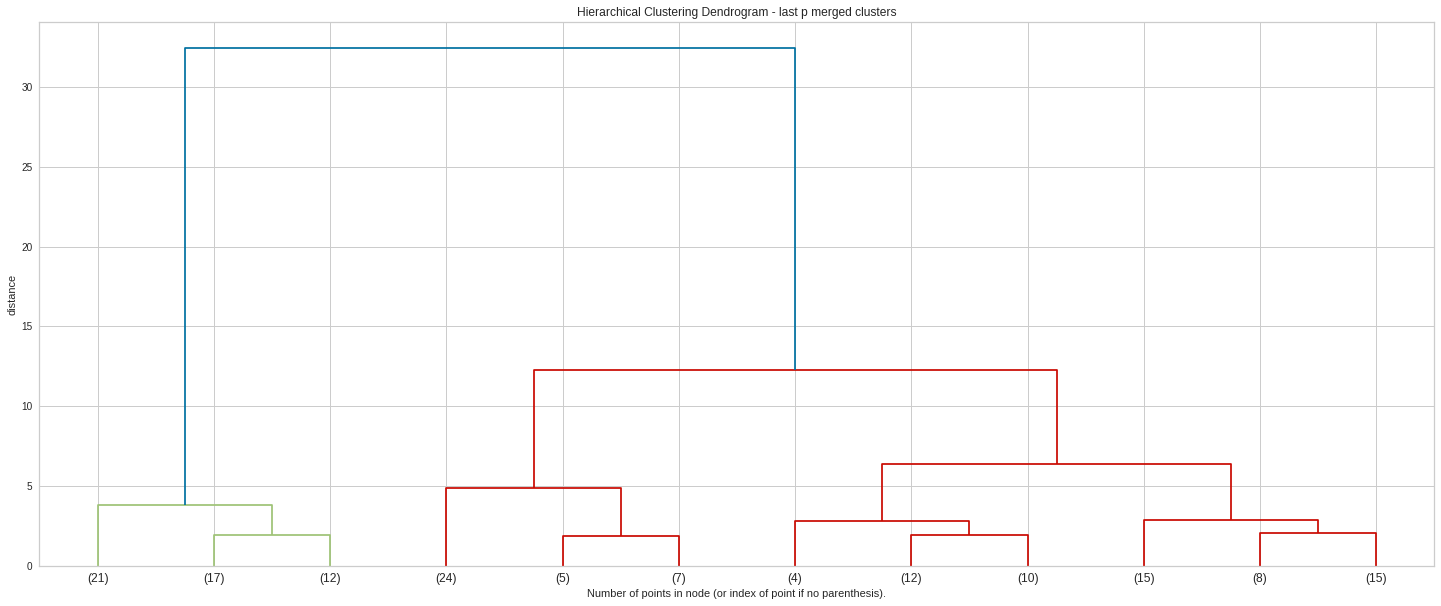

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - last p merged clusters')

# show only the last p merged clusters
plot_dendrogram(model, truncate_mode='lastp', p=12)

plt.ylabel('distance')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**Enriqueciendo la información de la visualización**

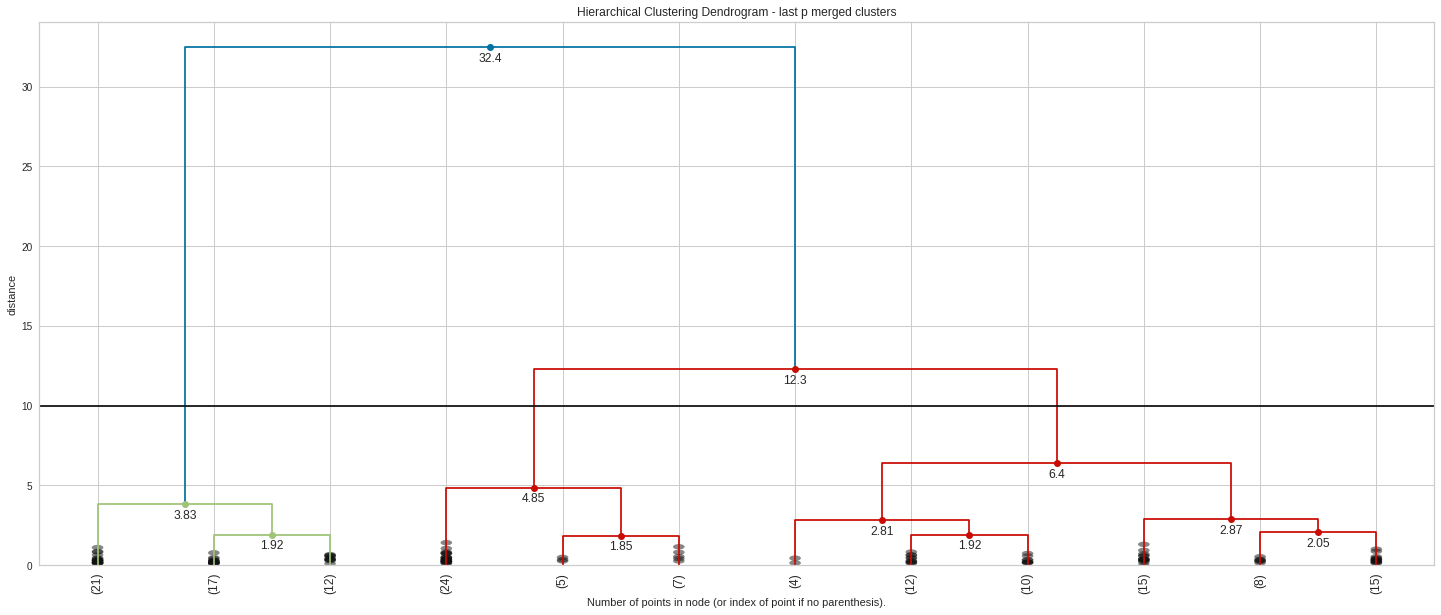

In [ ]:
def fancy_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(np.double)

    annotate_above = kwargs.pop('annotate_above', 0)
    max_d = kwargs.pop('max_d', None)
    # Plot the corresponding dendrogram
    ddata = dendrogram(linkage_matrix, **kwargs)
    
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
    if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata       


plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - last p merged clusters')

# show only the last p merged clusters
fancy_dendrogram(model, truncate_mode='lastp',  p=12, leaf_rotation=90., leaf_font_size=12.,
    show_contracted=True,annotate_above=1,max_d=10)

#max_d maxima distancia
#max_d = 10 -->> 3 clusters

plt.ylabel('distance')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()



**Básicamente, la línea horizontal es un umbral, que define la distancia mínima requerida para ser un grupo separado**

En el gráfico anterior, la línea horizontal pasa a través de tres líneas verticales que dan como resultado tres grupos: C1 de (21+17+12) , C2 (24 +5 +7) y C3 (4+12+10+15+8+15)


**Pros**
*   No se necesita especificar el número de clusters de antemano
*   La estructura jerárquica ofrece una forma natural de navegar los datos, más rico para análisis que el particionamiento

**Contras**
*   No escala bien en el número de ejemplos, costoso computacionalmente
*   No se recupera de decisiones incorrectas


## Evaluación con criterios externos
Se usan para medir el grado en que las etiquetas en los clusters coinciden con etiquetas de clases dadas.

*   **Homogeneidad**. Un resultado de agrupación satisface la homogeneidad si todos sus grupos contienen solo puntos de datos que son miembros de una sola clase.
*   **Completitud**. Un resultado de agrupación satisface la completidued si todos los puntos de datos que son miembros de una clase dada son elementos del mismo grupo.

*   **V-measure**. La medida V es la media armónica entre homogeneidad e completitud:
 
*   **Indice Rand** calcula una medida de similitud entre dos agrupaciones al considerar todos los pares de muestras y contar pares que se asignan en el mismo grupo o en grupos diferentes.
 
![](https://drive.google.com/uc?export=view&id=1hjknpNU4G_jpXmThdfQkENdcZs2eSl-c)    

**Predicción de los clusters de las instancias usando 3 clusters**



In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_pred=cluster.fit_predict(X)
print(labels_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
labels_true=iris.target
print(labels_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels_true, labels_pred))



Homogeneity: 0.761
Completeness: 0.780
V-measure: 0.770
Adjusted Rand-Index: 0.731


**Cambiamos la función de similitud y calculamos nuevamente**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
labels_pred=cluster.fit_predict(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels_true, labels_pred))


Homogeneity: 0.588
Completeness: 0.920
V-measure: 0.717
Adjusted Rand-Index: 0.564


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels_pred=cluster.fit_predict(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels_true, labels_pred))


Homogeneity: 0.700
Completeness: 0.745
V-measure: 0.722
Adjusted Rand-Index: 0.642


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
labels_pred=cluster.fit_predict(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels_true, labels_pred))


Homogeneity: 0.796
Completeness: 0.816
V-measure: 0.806
Adjusted Rand-Index: 0.759


**Aplicamos las métricas a la clasificación realizada con k-means++**


In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='k-means++',
            max_iter=300,
            tol=1e-04,
            random_state=0)
labels_pred = km.fit_predict(X)


print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels_true, labels_pred))


Homogeneity: 0.751
Completeness: 0.765
V-measure: 0.758
Adjusted Rand-Index: 0.730


k-means++ con 2 clusters

In [ ]:
from sklearn import metrics

km = KMeans(n_clusters=2,
            init='k-means++',
            max_iter=300,
            tol=1e-04,
            random_state=0)
labels_pred = km.fit_predict(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels_true, labels_pred))


Homogeneity: 0.522
Completeness: 0.884
V-measure: 0.657
Adjusted Rand-Index: 0.540


**Evaluación:**

*   Es una tarea compleja, involucra cierta subjetividad.
*   Varios índices internos y externos para considerar en forma conjunta
*   En casos donde el clustering no es la tarea primaria, es posible evaluarlo a través de la aplicación